In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LogNorm
import matplotlib as mpl
import matplotlib.transforms as mtransforms

In [2]:
# creates a grid of (lambda_1, Lambda_2) pairs for numerical integration of full classification-controlled RNCRN
vals = np.arange(0, 2.1, 0.1)
xv, yv = np.meshgrid(vals, np.flip(vals))
xval = xv.flatten()
yval = yv.flatten()

# the time length of the trajectory
tFinal = 1

# formating of subplots 
upper_limit = 0
x_train = np.append(xv.reshape(-1,1), yv.reshape(-1,1),axis=1)

In [3]:
# target classification function for setting colour in correct regions 
def xor(val1, val2, false_out = 0, true_out = 1):
    if val1 <= 1 and val2 <= 1:
        return false_out
    if val1 > 1 and val2 <= 1:
        return true_out
    if val1 <= 1 and val2 > 1:
        return true_out
    if val1 > 1 and val2 > 1:
        return false_out    
    else:
        return -1

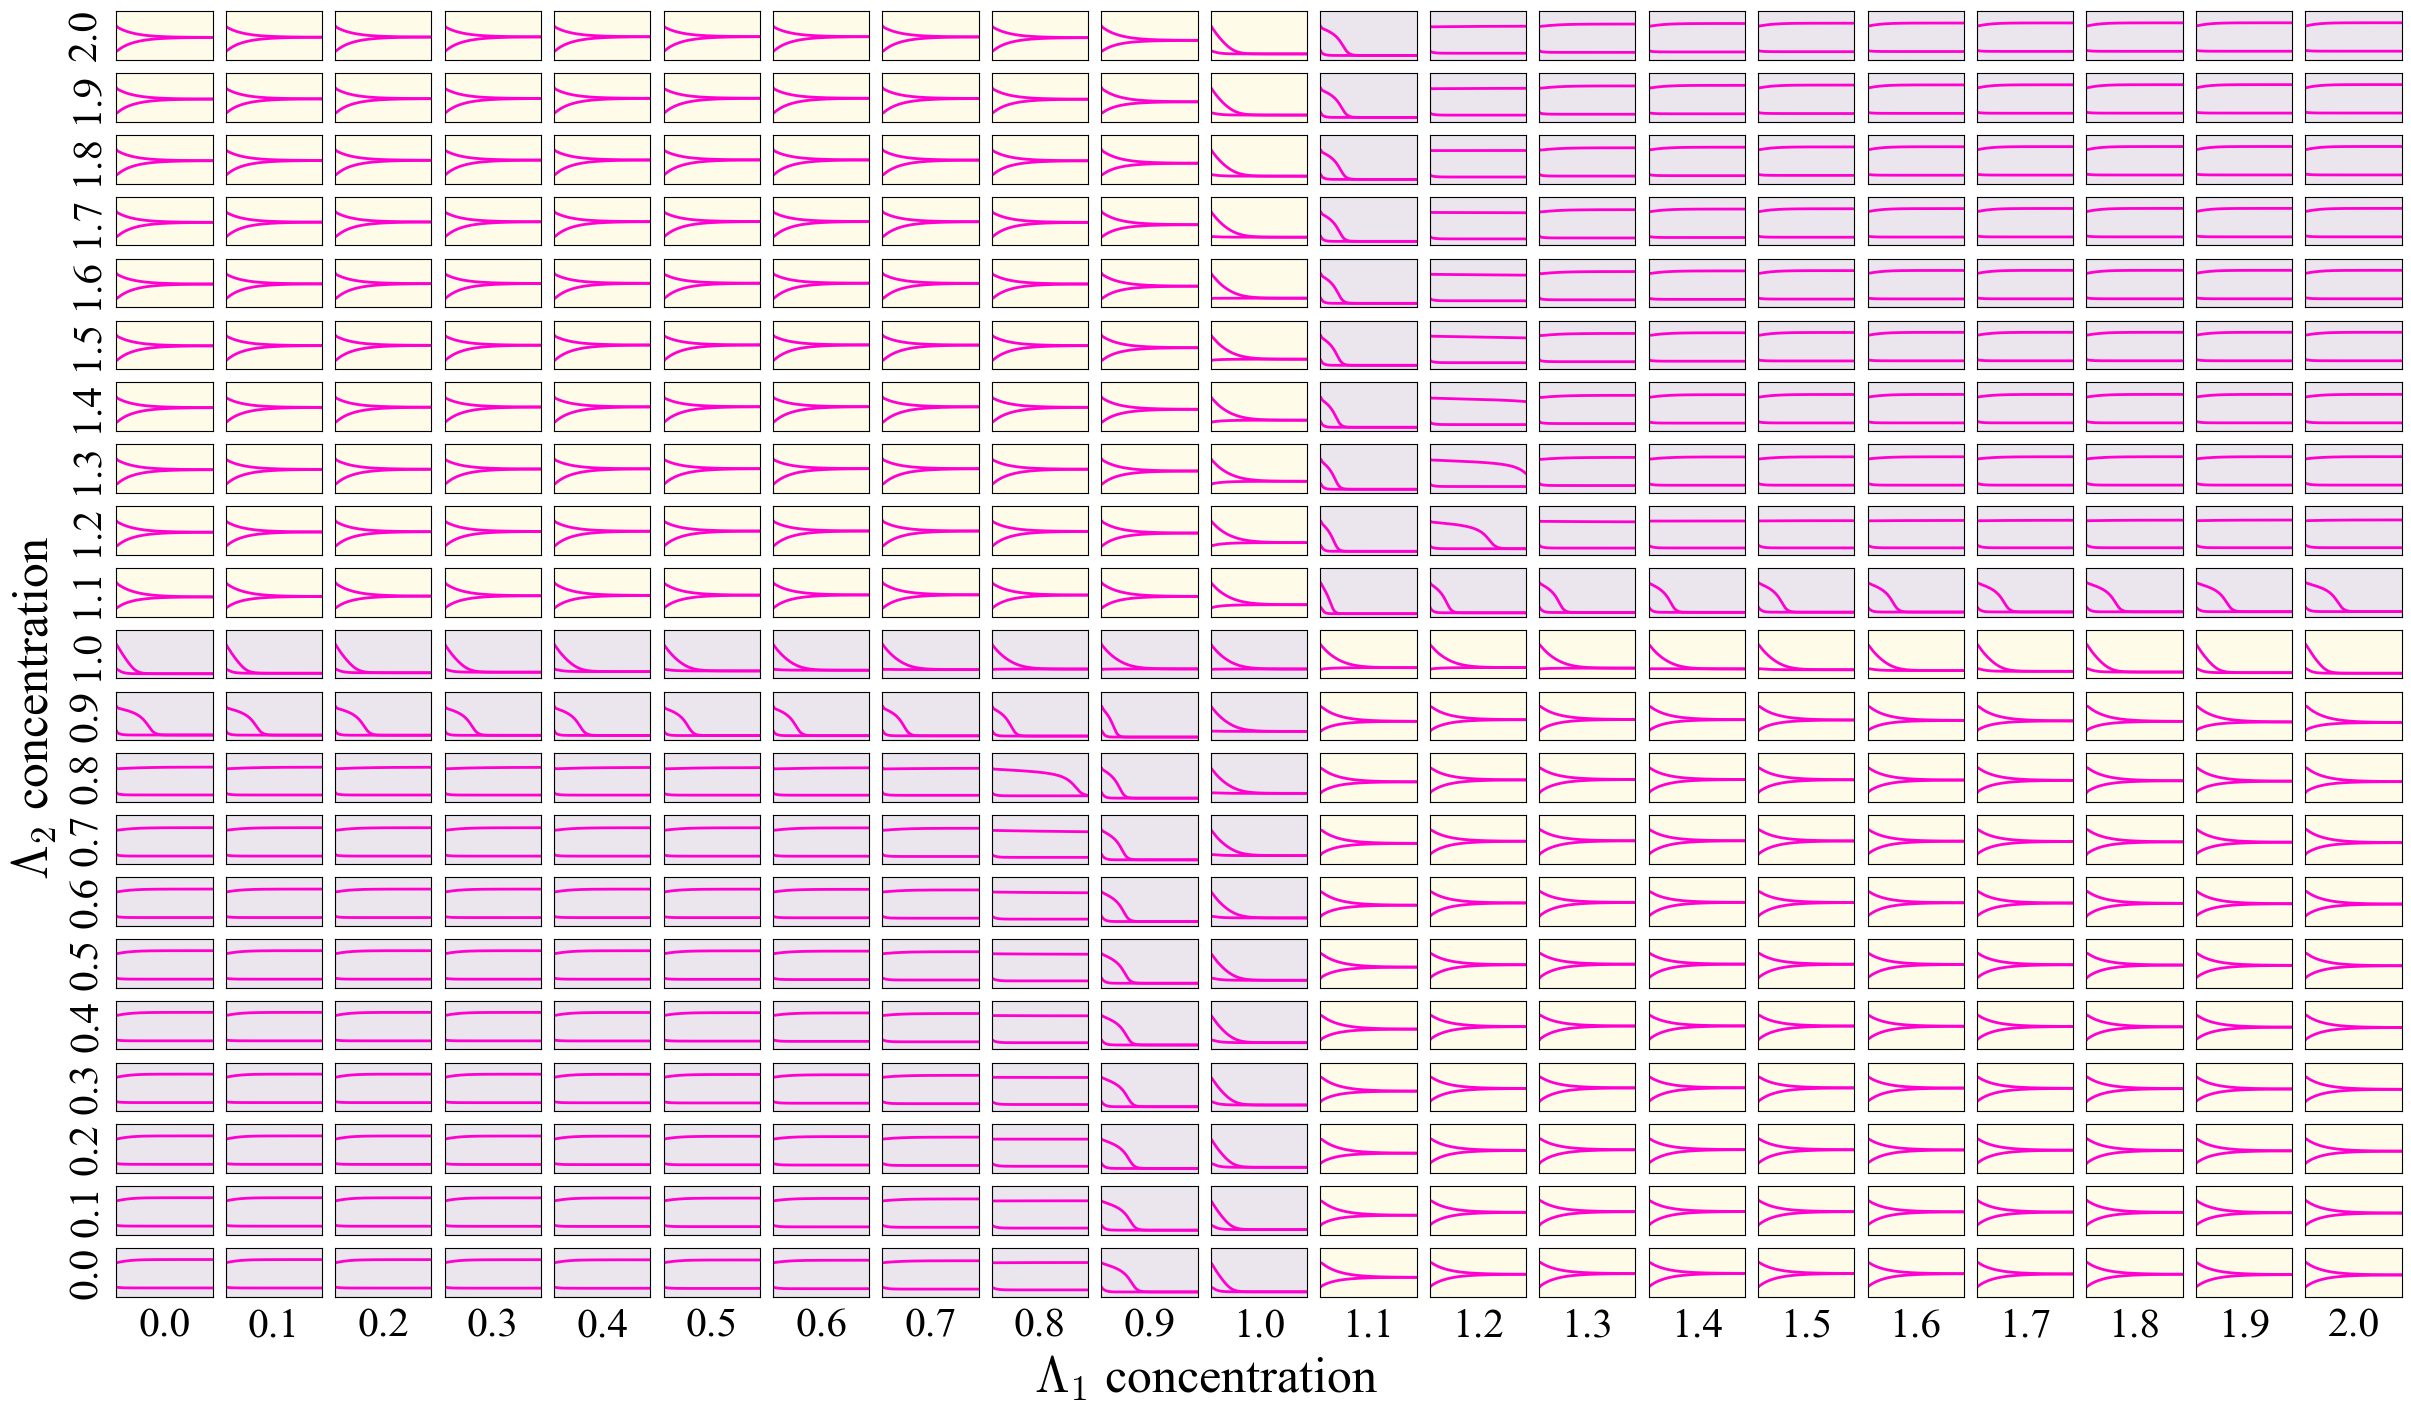

In [4]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 30
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [20 , 12]
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['legend.fancybox'] = False
ColList = ['#1F13FF','#FF00D0', '#2A2A72', '#A9A9A9']

num_graphs = len(vals)
size_of_repeats = num_graphs

res = []
mpl.rcParams['figure.figsize'] = [24, 14]

res =[]
for i in np.arange(1, size_of_repeats+1, 1):
    temp = []
    for j in np.arange(1, size_of_repeats+1, 1):
            temp += [str(size_of_repeats*(i-1)+(j))]
    res += [temp]

fig, axs = plt.subplot_mosaic(res,  layout='constrained', )


for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-40/72, 14/72, fig.dpi_scale_trans)       
    if  label == '1':
        label = '(a)'
       # ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
               # fontsize='medium', va='bottom', fontfamily='serif', ha='right')
        

cmap_obj = cm.get_cmap('viridis', 12)
normalizer = LogNorm(vmin=1e-3, vmax=1) #Normalize(0, 1)
im = cm.ScalarMappable(norm=normalizer)

for i in np.arange(1, num_graphs*num_graphs+1, 1):
    axb = axs[str(i)]
    lambda_1 = xval[i-1]
    lambda_2 = yval[i-1]
    
    if x_train[i-1, :][0] != lambda_1 or x_train[i-1, :][1] != lambda_2:
        raise Exception("x_train, lambda_1, and lambda_2 mismatched!")
        
    col_val = xor(lambda_1, lambda_2, true_out=0.93148434, false_out=0)
    
    try:
        t_low = np.load('data/sol_rncrn_low_t_i'+str(i)+'.npy')
        y_low = np.load('data/sol_rncrn_low_y_i'+str(i)+'.npy')
        axb.plot(t_low,y_low, color=ColList[1], linestyle='-', label='$x_1(t)$')    
    except:
        print('Cannot find i=' +str(i))
    try: 
        t_high = np.load('data/sol_rncrn_high_t_i'+str(i)+'.npy')
        y_high = np.load('data/sol_rncrn_high_y_i'+str(i)+'.npy')
        axb.plot(t_high, y_high, color=ColList[1], linestyle='-', label='$x_1(t)$')  
    except:
        print('Cannot find i=' +str(i))
    
    axb.set_xlim(0,tFinal)
    axb.set_ylim(0, 10)
    axb.fill([0, 0, 20, 20], [upper_limit, 25, 25, upper_limit], color = cmap_obj(col_val), alpha=0.1)
    axb.set_xticks([])
    axb.set_yticks([])
    if i >= num_graphs*(num_graphs-1)+1:
        axb.set_xlabel(f'{lambda_1:.1f}')

    if i % num_graphs  == 1:
        axb.set_ylabel(f'{lambda_2:.1f}')


fig.supxlabel('$\Lambda_1$ concentration')
fig.supylabel('$\Lambda_2$ concentration')

plt.show()
fig.savefig('figures/piecewise_xor_uni_bi.pdf', bbox_inches='tight')